# PHYS414 Final Project
### Melih Kayra Kadıoğlu
### 82985

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp               # ODE solver
from scipy.interpolate import UnivariateSpline

### Newtonian Approach
---------------------------------------------------------------------------------------------------------------------------------------

### a.1: Derivation of Lane Emden Equation

We can start from Newtonian hydrostatic equilibrium and mass conservation given in the introduction:
$$
\frac{dm}{dr}=4\pi r^2\rho(r),
\qquad
\frac{dP}{dr}=-\frac{Gm(r)\rho(r)}{r^2}
$$
Since we do not have the information for the density funcitoun, as suggested, we will use a polytropic equation of state (EOS) of such that
$$
P=K\rho^{\gamma}=K\rho^{1+\frac{1}{n}}
$$

Let us define the dimensionless variables
$$
\rho(r)=\rho_c\,\theta(\xi)^n,
\qquad
r=a\,\xi,
\qquad
P(r)=K\rho_c^{1+\frac1n}\,\theta(\xi)^{n+1}
$$
where $\rho_c=\rho(0)$ and $a$ is a constant to be chosen.

Then, 
$$
\frac{dP}{dr}
=K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
$$
Let us substitute this into hydrostatic equilibrium:
$$
K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
=
-\frac{Gm\rho_c\theta^n}{r^2}
$$
Now, cancel $\rho_c\theta^n$ to obtain
$$
K(n+1)\rho_c^{\frac1n}\frac{d\theta}{dr}
=
-\frac{Gm}{r^2},
\qquad\Rightarrow\qquad
m(r)=-\frac{K(n+1)\rho_c^{1/n}}{G}\,r^2\frac{d\theta}{dr}
$$
Differentiate this expression and use $\frac{dm}{dr}=4\pi r^2\rho_c\theta^n$:
$$
-\frac{K(n+1)\rho_c^{1/n}}{G}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
4\pi r^2\rho_c\theta^n
$$
Divide by $r^2$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
-\frac{4\pi G\rho_c}{K(n+1)\rho_c^{1/n}}\,\theta^n
=
-\frac{4\pi G}{K(n+1)}\,\rho_c^{1-\frac1n}\,\theta^n
$$

Now switch to $\xi$ using $r=a\xi$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
\frac{1}{a^2}\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)
$$
Choose $a$ such that
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Then we can get the Lane-Emden equation
$$
\boxed{
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)+\theta^n=0
}
$$
Regularity at the center implies
$$
\theta(0)=1,
\qquad
\theta'(0)=0.
$$

### a.2: Regular solution at the center

To find out the series solution of the regular equation's behaviour at the center, assume an even-power series near $\xi=0$:
$$
\theta(\xi)=1+a\xi^2+b\xi^4+\mathcal O(\xi^6).
$$
Compute
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)
=6a+20b\xi^2+\mathcal O(\xi^4),
$$
and
$$
\theta^n
=\left(1+a\xi^2+b\xi^4+\cdots\right)^n
=1+na\xi^2+\mathcal O(\xi^4).
$$
Substitute into Lane-Emden:
$$
(6a+20b\xi^2+\cdots)+(1+na\xi^2+\cdots)=0.
$$
Matching coefficients gives
$$
6a+1=0 \Rightarrow a=-\frac16,
\qquad
20b+na=0 \Rightarrow b=\frac{n}{120}.
$$
Hence the regular solution behaves as
$$
\boxed{
\theta(\xi)=1-\frac{1}{6}\xi^2+\frac{n}{120}\xi^4+\cdots
}
$$
and in particular $\theta'(0)=0$.

For $n=1$ the Lane-Emden equation becomes
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta=0
\quad\Longleftrightarrow\quad
\theta''+\frac{2}{\xi}\theta'+\theta=0.
$$
The regular solution satisfying $\theta(0)=1$ and $\theta'(0)=0$ is
$$
\boxed{
\theta(\xi)=\frac{\sin\xi}{\xi}
}
$$
Furthermore,
$$
\lim_{\xi\to 0}\frac{\sin\xi}{\xi}=1,
\qquad
\theta'(\xi)=\frac{\xi\cos\xi-\sin\xi}{\xi^2}
\Rightarrow
\theta'(0)=0
$$
The first zero occurs at $\xi_1=\pi$ so the stellar surface is at $\theta(\pi)=0$.

### a.3: Derivation of the mass formula

We will use the Lane-Emden substitutions that we had before
$$
\rho(r)=\rho_c\,\theta(\xi)^n,\qquad r=a\,\xi,\qquad R=a\,\xi_n,\qquad \theta(\xi_n)=0
$$
where $\xi_n$ is the first zero of $\theta$.

The enclosed mass is
$$
m(r)=\int_0^r 4\pi r'^2\rho(r')\,dr'
=4\pi \rho_c \int_0^{a\xi} r'^2 \theta\!\left(\frac{r'}{a}\right)^n dr'
$$
Let $r'=a\xi'$ so that $dr'=a\,d\xi'$ and $r'^2=a^2\xi'^2$:
$$
m(\xi)=4\pi\rho_c a^3\int_0^\xi \xi'^2 \theta(\xi')^n\,d\xi'
$$
Hence the total mass is
$$
M=m(\xi_n)=4\pi\rho_c a^3\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$

Now, start from the Lane-Emden equation such that
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta^n=0
\quad\Longrightarrow\quad
\frac{d}{d\xi}\!\left(\xi^2\theta'\right)=-\xi^2\theta^n
$$
Integrate from $0$ to $\xi_n$:
$$
\left[\xi^2\theta'(\xi)\right]_0^{\xi_n}=-\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$
Regularity at the center implies that $\xi^2\theta'(\xi)\to 0$ as $\xi\to 0$, so
$$
\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi = -\xi_n^2\theta'(\xi_n)
$$
Therefore,
$$
M=4\pi\rho_c a^3\left[-\xi_n^2\theta'(\xi_n)\right]
$$
By using $a=R/\xi_n$, resuly yields:
$$
\boxed{
M = 4\pi\rho_c R^3\left(-\frac{\theta'(\xi_n)}{\xi_n}\right)
}
$$

### a.4: Proof that mass is a function of radius

For a polytrope $P=K\rho^{1+1/n}$ one has
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Hence
$$
R=a\xi_n
=\xi_n\left(\frac{(n+1)K}{4\pi G}\right)^{1/2}\rho_c^{\frac{1-n}{2n}}
\quad\Rightarrow\quad
\rho_c=
\left[\frac{R}{\xi_n}\left(\frac{4\pi G}{(n+1)K}\right)^{1/2}\right]^{\frac{2n}{1-n}}
\qquad (n\neq 1)
$$
Insert this into $M=4\pi\rho_c R^3\left(-\theta'(\xi_n)/\xi_n\right)$ to get
$$
\boxed{
M \propto R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

Define the Lane-Emden constant
$$
\omega_n\equiv -\xi_n^2\theta'(\xi_n) \;>\;0.
$$
Then, a convenient explicit proportionality constant is
$$
\boxed{
M
=
4\pi\,\omega_n\,
\xi_n^{-\frac{3-n}{1-n}}
\left(\frac{(n+1)K}{4\pi G}\right)^{\frac{n}{\,n-1\,}}
R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

### b.1: White Dwarf's Mass-Radius relation

Surface gravity:
$$g = \dfrac{G M}{R^2}$$

Solve for radius:
$$R = \sqrt{\dfrac{G M}{g}}$$

The data gives $\log_{10}(g)$ in CGS, so:
$$g = 10^{\log g} ;; [\mathrm{cm,s^{-2}}]$$

Mass is in solar masses:
$$M = \left(\dfrac{M}{M_\odot}\right) M_\odot$$

Thus in CGS:
$$R = \sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Convert to Earth radii:
$$\dfrac{R}{R_\oplus} = \dfrac{1}{R_\oplus}\sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Constants (CGS):
$$G_{\mathrm{cgs}} = 6.67430\times 10^{-8},\mathrm{cm^3,g^{-1},s^{-2}}$$

$$M_\odot = 1.98847\times 10^{33},\mathrm{g}$$

$$R_\oplus = 6.371\times 10^{8},\mathrm{cm}$$

Therefore, the final form of the formula is:
$$\displaystyle R_{R_\oplus} = \frac{1}{R_\oplus}\sqrt{\frac{G_{\mathrm{cgs}} M_\odot}{10^{\log g}} , M_{\rm WD}}$$
where $M_{\rm WD}$ is the mass column in solar masses.

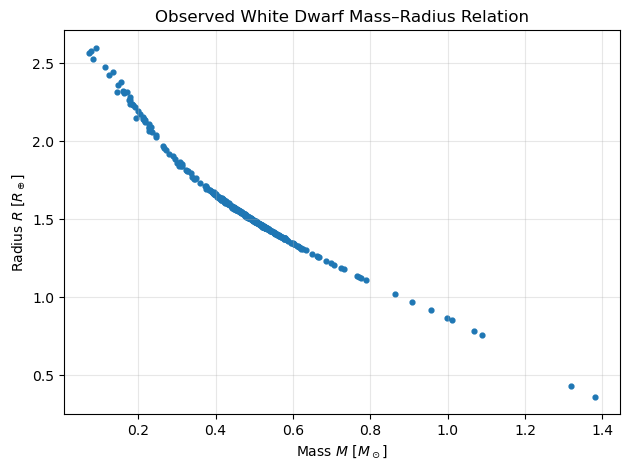

In [14]:
# constants in CGS
G = 6.67430e-8
M_sun = 1.98847e33
R_earth = 6.371e8

# read data 
data = pd.read_csv("white_dwarf_data.csv")

mass_col = [c for c in data.columns if "mass" in c.lower()][0]
logg_col = [c for c in data.columns if "log" in c.lower()][0]

M = pd.to_numeric(data[mass_col], errors="coerce").to_numpy()      # [M_sun]
logg = pd.to_numeric(data[logg_col], errors="coerce").to_numpy()  # log10(g)

valid = np.isfinite(M) & np.isfinite(logg)
M = M[valid]
logg = logg[valid]

# Newtonian radius from log g
g = 10.0**logg                              # cm/s^2
R_cgs = np.sqrt(G * M * M_sun / g)          # cm
R_Rearth = R_cgs / R_earth                 # Earth radii

#plot M vs R
plt.figure()
plt.scatter(M, R_Rearth, s=12)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Radius $R$ [$R_\oplus$]")
plt.title("Observed White Dwarf Mass–Radius Relation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### c.1: Mass-Radius & Central Density-Mass fits

We shall make a small-$x$ expansion of the equation of state for cold WDs to obtain the polytrope form.  
Assume that the EOS for cold WDs is written in the standard degenerate parametric form with a dimensionless parameter $x$ and constants $C,D,q$ such that the density scales as  

$$
\rho = D\,x^q \quad \Rightarrow \quad x = \left(\frac{\rho}{D}\right)^{1/q}.
$$

For low-mass WDs, $x\ll 1$. The pressure function expands as  

$$
P(x) = C\,F(x),
$$

with the leading term  

$$
F(x) = \frac{8}{5}x^5 + O(x^7).
$$

Therefore,

$$
P \simeq C\,\frac{8}{5}x^5
      = \frac{8C}{5}\left(\frac{\rho}{D}\right)^{5/q}
      = \frac{8C}{5D^{5/q}}\rho^{5/q}.
$$

Comparing to the polytropic form  

$$
P = K_* \,\rho^{1+\frac{1}{n_*}},
$$

we identify the exponent

$$
1+\frac{1}{n_*} = \frac{5}{q}.
$$

Solving for $n_*$ gives

$$
\frac{1}{n_*} = \frac{5}{q}-1 = \frac{5-q}{q},
\qquad
n_* = \frac{q}{5-q},
$$

and matching the prefactor yields

$$
K_* = \frac{8C}{5D^{5/q}}.
$$

Thus,

$$
n_* = \frac{q}{5-q},
\qquad
K_* = \frac{8C}{5D^{5/q}}.
$$

For a polytrope $P = K\rho^{1+1/n}$, define

$$
a^2 = \frac{(n+1)K}{4\pi G}\,\rho_c^{\frac{1}{n}-1}.
$$

The Lane–Emden solution $\theta(\xi)$ gives the first zero $\xi_1$ and

$$
\omega_n \equiv -\xi_1^2\theta'(\xi_1).
$$

Then

$$
R = a\,\xi_1,
$$

and

$$
M = 4\pi a^3 \rho_c\,\omega_n.
$$

Eliminating $\rho_c$ gives the low-mass power-law mass–radius relation

$$
R = \mathcal{A}(n)\,K^{\frac{n}{3-n}}\,M^{\frac{1-n}{3-n}},
$$

where

$$
\mathcal{A}(n)
= \xi_1\,(4\pi\omega_n)^{-\frac{1-n}{3-n}}
  \left(\frac{n+1}{4\pi G}\right)^{\frac{n}{3-n}}.
$$

Once $n$ and $K$ are fixed, the central density of each star is

$$
\rho_c
=
\left[
\frac{M}{4\pi\omega_n}
\left(\frac{4\pi G}{(n+1)K}\right)^{3/2}
\right]^{\frac{2n}{3-n}}.
$$

Hard cutoff Mmax = 0.45 Msun | fit subset size = 130
beta = -0.3413128573598856
n_real = 1.5089235602075624 | q_real = 3.0071134572205334 | using integer q = 3
Using n_* = 1.5
xi1 = 3.6537537362296484 | omega_n = 2.714055122797973
K_* (CGS) = 2791233246288.6675


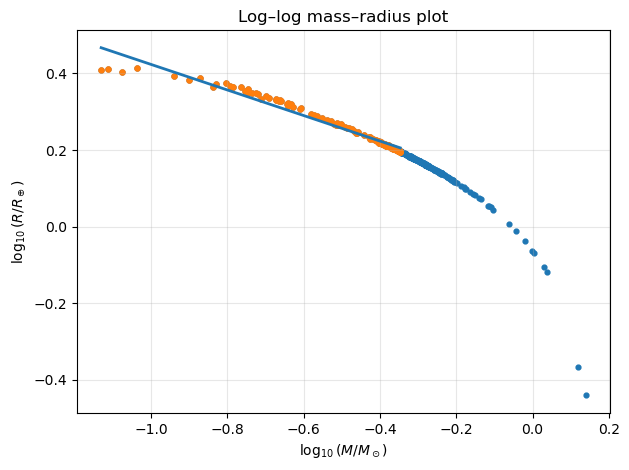

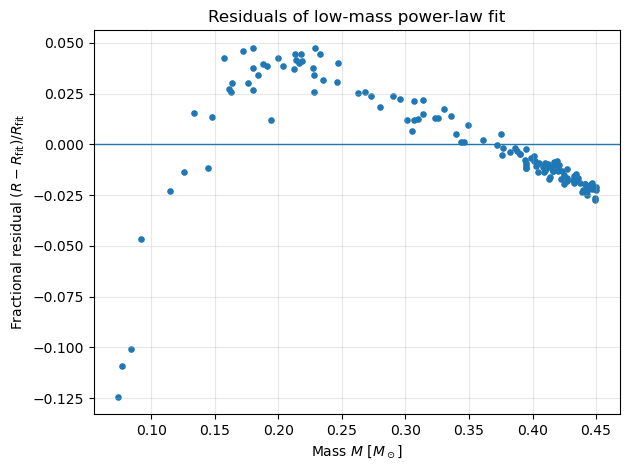

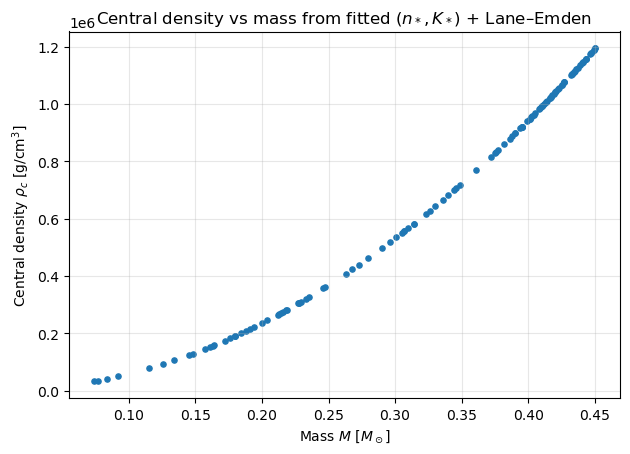

In [23]:
M = np.asarray(M)                                     # [Msun]
R_cgs = np.asarray(R_cgs)                             # [cm]
R_Rearth = np.asarray(R_Rearth)                       # [Rearth]

idx = np.argsort(M)                                   # sort so low masses come first
M = M[idx]
R_cgs = R_cgs[idx]
R_Rearth = R_Rearth[idx]

# for the sake of clarity, we choose low-mass subset by a cutoff
Mmax = 0.45                                            # Msun  (adjust if you want)
mask_fit = (M <= Mmax)                                 # choose low-mass stars only

Mfit = M[mask_fit]                                     # [Msun]
Rfit_cgs = R_cgs[mask_fit]                             # [cm]
Rfit_Rearth = R_Rearth[mask_fit]                       # [Rearth]

print("Hard cutoff Mmax =", Mmax, "Msun | fit subset size =", len(Mfit))

# fit slope beta from ln R = c0 + beta ln M
x = np.log(Mfit)                                       # ln(M/Msun)
y = np.log(Rfit_cgs)                                   # ln(R/cm)
A = np.vstack([np.ones_like(x), x]).T
(c0, beta), *_ = np.linalg.lstsq(A, y, rcond=None)

# slope -> n_real -> q_real
n_real = (1.0 - 3.0*beta) / (1.0 - beta)               # beta = (1-n)/(3-n)
q_real = 5.0 * n_real / (n_real + 1.0)                 # 1+1/n = 5/q

# enforce integer q and lock n_* from it
q_int = int(np.rint(q_real))                            # nearest integer
if q_int not in [1, 2, 3, 4]:
    q_int = 3                                           # hint expects q=3
n = q_int / (5.0 - q_int)                               # n_* = q/(5-q)

print("beta =", beta)
print("n_real =", n_real, "| q_real =", q_real, "| using integer q =", q_int)
print("Using n_* =", n)

if n >= 5.0:
    raise ValueError(f"n_* = {n} >= 5 (no finite surface). Lower Mmax or re-check fit.")

# robust Lane–Emden solver
def lane_emden_constants(n, xi_max=200.0):
    eps = 1e-8
    y0 = [1.0 - eps**2/6.0, -eps/3.0]                  # [theta, dtheta/dxi]

    def rhs(xi, y):
        theta, dtheta = y
        theta_pos = theta if theta > 0.0 else 0.0      # avoid negative^fractional
        ddtheta = -(2.0/xi)*dtheta - theta_pos**n
        return [dtheta, ddtheta]

    def surface(xi, y):
        return y[0]                                    # theta=0 surface
    surface.terminal = True
    surface.direction = -1

    sol = solve_ivp(rhs, (eps, xi_max), y0, events=surface,
                    rtol=1e-10, atol=1e-12, max_step=0.05)

    if len(sol.t_events[0]) == 0:
        raise RuntimeError("Lane–Emden did not hit theta=0 (increase xi_max or check n).")

    xi1 = sol.t_events[0][0]
    theta1, dtheta1 = sol.y_events[0][0]
    omega_n = -xi1**2 * dtheta1
    return xi1, omega_n

xi1, omega_n = lane_emden_constants(n)
print("xi1 =", xi1, "| omega_n =", omega_n)

# model: R = A(n) * K^{n/(3-n)} * M^{(1-n)/(3-n)}   with M in grams, R in cm
p = n/(3.0 - n)                                       # exponent of K
s = (1.0 - n)/(3.0 - n)                               # exponent of M

A_n = xi1 * (4.0*np.pi*omega_n)**(-s) * ((n+1.0)/(4.0*np.pi*G))**p

Mfit_cgs = Mfit * M_sun                               # g

# ln R = ln A_n + p ln K + s ln M  => ln K from mean residual
lnK = np.mean((np.log(Rfit_cgs) - np.log(A_n) - s*np.log(Mfit_cgs)) / p)
K_star = np.exp(lnK)

print("K_* (CGS) =", K_star)

# here we compute central densities rho_c for the fit subset
A0 = (n+1.0) * K_star / (4.0*np.pi*G)                 # (n+1)K/(4piG)
rho_c = (Mfit_cgs / (4.0*np.pi*omega_n * A0**1.5))**(2.0*n/(3.0-n))  # g/cm^3

# to fit the curve for overlay
Mgrid = np.linspace(Mfit.min(), Mfit.max(), 300)       # Msun
Mgrid_cgs = Mgrid * M_sun                              # g
Rmodel_cgs = A_n * (K_star**p) * (Mgrid_cgs**s)         # cm
Rmodel_Rearth = Rmodel_cgs / R_earth                    # Rearth

# plot 1: log-log MR with fit subset + overlay curve
plt.figure()
plt.scatter(np.log10(M), np.log10(R_Rearth), s=12)                      # all data
plt.scatter(np.log10(Mfit), np.log10(Rfit_Rearth), s=14)                # fit subset
plt.plot(np.log10(Mgrid), np.log10(Rmodel_Rearth), linewidth=2)         # fitted power law
plt.xlabel(r"$\log_{10}(M/M_\odot)$")
plt.ylabel(r"$\log_{10}(R/R_\oplus)$")
plt.title("Log–log mass–radius plot")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# plot 2: residuals on the fit subset 
Rmodel_on_fit_cgs = A_n * (K_star**p) * (Mfit_cgs**s)                    # model at fit points
frac_resid = (Rfit_cgs - Rmodel_on_fit_cgs) / Rmodel_on_fit_cgs          # fractional residual

plt.figure()
plt.scatter(Mfit, frac_resid, s=14)
plt.axhline(0.0, linewidth=1)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Fractional residual $(R - R_{\rm fit})/R_{\rm fit}$")
plt.title("Residuals of low-mass power-law fit")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# plot 3: rho_c vs M for stars used in fit
plt.figure()
plt.scatter(Mfit, rho_c, s=14)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Central density $\rho_c$ [g/cm$^3$]")
plt.title(r"Central density vs mass from fitted $(n_*,K_*)$ + Lane–Emden")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

$
\textbf{(plot-1) Log–log } M\text{–}R \text{ with fit:}
\text{For low masses the points lie almost on a straight line in log–log scale,}
$
$
\text{which means the radius follows a simple power law } R\propto M^\beta,
$
$
\text{as expected from a polytropic equation of state. The deviation at higher masses}
$
$
\text{shows where the low-density } (x\ll1) \text{ approximation is no longer valid.}
$

$
\textbf{(plot-2) Residuals:}
\text{The residuals are small in the fitted mass range,}
$
$
\text{so the power-law describes the low-mass white dwarfs reasonably well.}
$
$
\text{The systematic trend near the upper mass limit indicates the breakdown of the}
$
$
\text{simple polytropic behavior.}
$

$
\textbf{(plot-3) Central density vs mass:}
\text{The central density } \rho_c \text{ increases smoothly with mass,}
$
$
\text{which is physically expected since more massive white dwarfs must be more}
$
$
\text{strongly compressed by gravity. This follows directly from the Lane–Emden}
$
$
\text{scaling of a polytropic star with the fitted } (n_*,K_*) \text{ values.}
$

### d.1: Fitting the full degenerate EOS with one parameter D

$
\text{From the low-mass fit we already determined } q,
\text{ and we obtained } K_* \text{ from the polytropic approximation.}
$

$
\text{In the small-}x \text{ limit the EOS becomes } P \simeq \frac{8C}{5}x^5,
\qquad \rho = D x^q \Rightarrow x = \left(\frac{\rho}{D}\right)^{1/q}.
$

$
\Rightarrow\;
P \simeq \frac{8C}{5}\left(\frac{\rho}{D}\right)^{5/q}
= \left(\frac{8C}{5D^{5/q}}\right)\rho^{5/q}.
$

$
\text{Comparing with } P = K_* \rho^{1+1/n_*} \text{ and } 1+\frac{1}{n_*}=\frac{5}{q},
\text{ we identify }
K_* = \frac{8C}{5D^{5/q}}
\;\Rightarrow\;
C = \frac{5K_*}{8}\,D^{5/q}.
$

$
\text{Therefore, once } q \text{ and } K_* \text{ are known, the full EOS has only one unknown: } D.
$

$
\text{For a given trial } D,\; C(D)=\frac{5K_*}{8}D^{5/q}\text{ is fixed, and we can compute a theoretical }
(M,R)\text{ curve by solving the Newtonian structure IVP:}
$

$
\frac{dm}{dr}=4\pi r^2\rho,\qquad
\frac{dP}{dr}=-\frac{Gm\rho}{r^2},\qquad
P=P(\rho;C(D),D).
$

$
\text{To avoid root-finding for each data radius, we do the following:}
$

$
\text{(i) Choose } N_s \text{ central densities } \rho_{c,i}\text{ (e.g. }N_s=20\text{) to generate }
N_s \text{ model stars by solving the IVP, giving sample points } (R_i,M_i).
$

$
\text{(ii) Build an interpolant } \widetilde{M}(R;D)\text{ from these sample points over the full radius range}
\text{ (a spline interpolation is appropriate since the curve is smooth).}
$

$
\text{(iii) For every observed radius }R_j\text{, predict } M_{\rm pred}(R_j;D)=\widetilde{M}(R_j;D)
\text{ and compute a total error, e.g.}
$

$
E(D)=\sqrt{\frac{1}{N}\sum_{j=1}^N\left[M_{\rm pred}(R_j;D)-M_j\right]^2 }.
$

$
\text{(iv) Repeat for many } D \text{ values and choose } D_{\rm best}=\arg\min_D E(D).
$

$
\text{Finally, compare } C \text{ and } D \text{ with the theoretical values (for }\mu_e=2\text{):}
\qquad
C_{\rm th}=\frac{m_e^4c^5}{24\pi^2\hbar^3},
\qquad
D_{\rm th}=\frac{m_um_e^3c^3\mu_e}{3\pi^2\hbar^3}.
$

/var/folders/62/dfvj9nz52cs65rm5md684nk80000gn/T/ipykernel_70000/955027960.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  drho = -(G*m*rho/(r*r)) / dp                 # dρ/dr = (dP/dr)/(dP/dρ)


q = 3 | K_* = 2791233246288.6675
D_best = 843183.972248634 | RMS error = 0.16985942587201136 Msun
C_best = 1.312844788060494e+22
Compare: D_best/D_th = 0.43287612810830584 | C_best/C_th = 0.2187224473819797


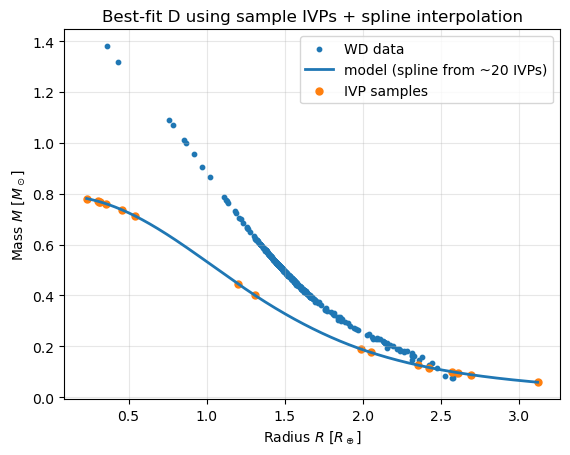

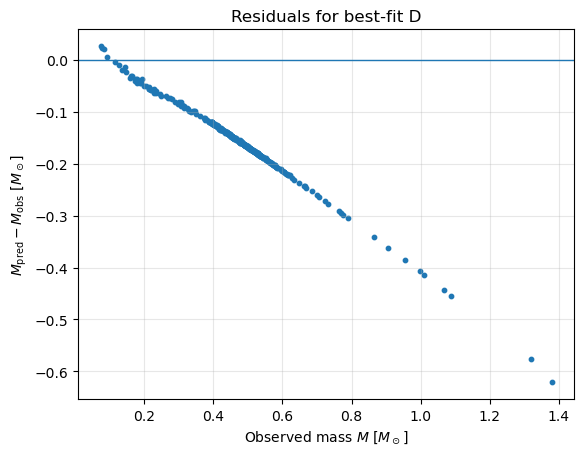

In [29]:
M_data = np.asarray(M, dtype=float)                 # Msun
R_data = np.asarray(R_cgs, dtype=float)             # cm

q = int(q_int) if "q_int" in globals() else 3       # from part (c), integer
Kstar = float(K_star)                               # from part (c), CGS

# sort by radius
ordr = np.argsort(R_data)
R_data = R_data[ordr]
M_data = M_data[ordr]

Rmin, Rmax = float(R_data.min()), float(R_data.max())

# EOS: rho = D x^q,  P = C(D) F(x) 
def F(x):
    return x*(2.0*x*x - 3.0)*np.sqrt(1.0 + x*x) + 3.0*np.arcsinh(x)

def dFdx(x):
    s = np.sqrt(1.0 + x*x)
    return (6.0*x*x - 3.0)*s + x*(2.0*x*x - 3.0)*(x/s) + 3.0/s

def C_of_D(D):
    # from matching low-x polytrope: C = (5/8) K_* D^{5/q}
    return (5.0*Kstar/8.0) * D**(5.0/q)

def dPdrho(rho, D):
    # P = C(D) F(x), x=(rho/D)^(1/q)
    x = (rho/D)**(1.0/q)
    dPdx = C_of_D(D) * dFdx(x)
    dxdrho = (1.0/q) * (1.0/D) * (rho/D)**(1.0/q - 1.0)
    return dPdx * dxdrho

# integrate one star for given (D, rho_c)
_star_cache = {}                                   # speed: cache repeated solves

def integrate_star(D, rho_c):
    key = (float(D), float(rho_c))
    if key in _star_cache:
        return _star_cache[key]

    r0 = 1e4                                        # in cm, start away from 0 to avoid 0/0
    m0 = (4.0*np.pi/3.0) * rho_c * r0**3             # series: m ~ 4πρ r^3/3
    y0 = [m0, rho_c]                                 # [m, rho]

    def rhs(r, y):
        m, rho = y
        if rho <= 0.0:
            return [0.0, 0.0]
        dm = 4.0*np.pi*r*r*rho
        dp = dPdrho(rho, D)
        drho = -(G*m*rho/(r*r)) / dp                 # dρ/dr = (dP/dr)/(dP/dρ)
        return [dm, drho]

    def surface(r, y):
        return y[1]                                  # stop when rho hits 0
    surface.terminal = True
    surface.direction = -1

    rmax = 8.0 * Rmax                                # upper bound

    sol = solve_ivp(
        rhs, (r0, rmax), y0,
        events=surface,
        method="RK23",                               # because it is faster than RK45
        rtol=1e-6, atol=1e-8,                        # relaxed tolerances
        max_step=8e7                                 # step size
    )

    if len(sol.t_events[0]) == 0:
        _star_cache[key] = None
        return None

    Rstar = sol.t_events[0][0]
    Mstar = sol.y_events[0][0][0]
    out = (Rstar, Mstar)
    _star_cache[key] = out
    return out

# build ~Ns sample (R,M) points and spline M(R) for a given D
def build_spline_M_of_R(D, Ns=12, rho_lo=1e4, rho_hi=1e10):
    # scan rho_c in log space
    rho_grid = np.logspace(np.log10(rho_lo), np.log10(rho_hi), Ns*8)

    Rs, Ms = [], []
    for rho_c in rho_grid:
        out = integrate_star(D, rho_c)
        if out is None:
            continue
        Rstar, Mstar = out

        # let us set a wide range so we almost always cover data range for D
        if (Rstar >= 0.6*Rmin) and (Rstar <= 1.4*Rmax):
            Rs.append(Rstar)
            Ms.append(Mstar/M_sun)                   # convert to Msun

        if len(Rs) >= Ns:
            break

    if len(Rs) < 6:
        return None

    Rs = np.asarray(Rs, dtype=float)
    Ms = np.asarray(Ms, dtype=float)

    srt = np.argsort(Rs)
    Rs = Rs[srt]
    Ms = Ms[srt]

    # remove duplicates in R
    Ru, idx = np.unique(Rs, return_index=True)
    Mu = Ms[idx]
    if len(Ru) < 6:
        return None

    spl = UnivariateSpline(Ru, Mu, s=0)              # exact spline
    return spl, (Ru, Mu)

# for valid splines we now will calculate RMS error for one D
def rms_error_for_D(D, Ns=12):
    built = build_spline_M_of_R(D, Ns=Ns)
    if built is None:
        return np.inf, None

    spl, (Rs, Ms) = built
    good = (R_data >= Rs.min()) & (R_data <= Rs.max())
    if np.sum(good) < 20:
        return np.inf, None

    M_pred = spl(R_data[good])
    err = np.sqrt(np.mean((M_pred - M_data[good])**2))
    return err, (spl, Rs, Ms, good)

# for comparison let us define these
hbar = 1.054571817e-27                             # erg*s
c = 2.99792458e10                                  # cm/s
m_e = 9.1093837015e-28                              # g
m_u = 1.66053906660e-24                             # g
mu_e = 2.0

D_th = (m_u * m_e**3 * c**3 * mu_e) / (3.0*np.pi**2 * hbar**3)
C_th = (m_e**4 * c**5) / (24.0*np.pi**2 * hbar**3)

# grid search
Ns_search = 10                                      # fewer IVPs per D while searching

D_grid1 = D_th * np.logspace(-0.6, 0.6, 12)         # coarse case
best = (np.inf, None, None)

for D_try in D_grid1:
    err, pack = rms_error_for_D(D_try, Ns=Ns_search)
    if err < best[0]:
        best = (err, D_try, pack)

if best[1] is None:
    raise RuntimeError("Coarse grid produced no valid model. Widen rho_hi or radius window.")

err1, D1, pack1 = best

D_grid2 = D1 * np.logspace(-0.2, 0.2, 12)           # refined
best = (np.inf, None, None)

for D_try in D_grid2:
    err, pack = rms_error_for_D(D_try, Ns=Ns_search)
    if err < best[0]:
        best = (err, D_try, pack)

err_best, D_best, pack_best = best
spl_best, Rs_samp, Ms_samp, good = pack_best

# rebuild once with nicer Ns for final curve/plot
rebuilt = build_spline_M_of_R(D_best, Ns=20)
if rebuilt is not None:
    spl_best, (Rs_samp, Ms_samp) = rebuilt
    good = (R_data >= Rs_samp.min()) & (R_data <= Rs_samp.max())

C_best = C_of_D(D_best)

print("q =", q, "| K_* =", Kstar)
print("D_best =", D_best, "| RMS error =", err_best, "Msun")
print("C_best =", C_best)
print("Compare: D_best/D_th =", D_best/D_th, "| C_best/C_th =", C_best/C_th)

# plots of data + IVP samples + spline model
R_plot = np.linspace(Rs_samp.min(), Rs_samp.max(), 400)
M_plot = spl_best(R_plot)

plt.figure()
plt.scatter(R_data/R_earth, M_data, s=10, label="WD data")
plt.plot(R_plot/R_earth, M_plot, linewidth=2, label="model (spline from ~20 IVPs)")
plt.scatter(Rs_samp/R_earth, Ms_samp, s=25, label="IVP samples")
plt.xlabel(r"Radius $R$ [$R_\oplus$]")
plt.ylabel(r"Mass $M$ [$M_\odot$]")
plt.title("Best-fit D using sample IVPs + spline interpolation")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# residuals in mass (only where spline valid)
M_pred = np.full_like(M_data, np.nan, dtype=float)
M_pred[good] = spl_best(R_data[good])

plt.figure()
plt.scatter(M_data[good], M_pred[good] - M_data[good], s=10)
plt.axhline(0.0, linewidth=1)
plt.xlabel(r"Observed mass $M$ [$M_\odot$]")
plt.ylabel(r"$M_{\rm pred}-M_{\rm obs}$ [$M_\odot$]")
plt.title("Residuals for best-fit D")
plt.grid(alpha=0.3)
plt.show()
